# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

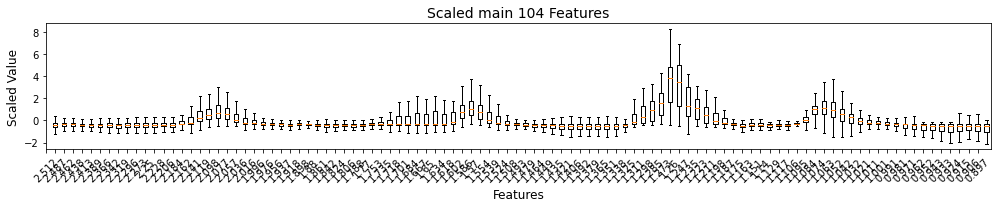

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

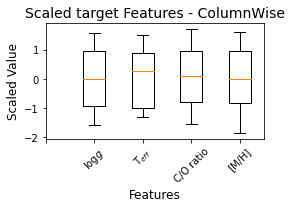

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

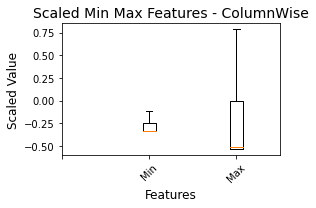

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:22 - loss: 1.8572 - gravity_loss: 0.4564 - c_o_ratio_loss: 0.4705 - metallicity_loss: 0.4589 - temperature_loss: 0.4714 - gravity_mae: 0.8531 - c_o_ratio_mae: 0.8898 - metallicity_mae: 0.8554 - temperature_mae: 0.8738

 2/13 [===>..........................] - ETA: 42s - loss: 1.8502 - gravity_loss: 0.4637 - c_o_ratio_loss: 0.4713 - metallicity_loss: 0.4538 - temperature_loss: 0.4615 - gravity_mae: 0.8623 - c_o_ratio_mae: 0.8925 - metallicity_mae: 0.8485 - temperature_mae: 0.8632 

 3/13 [=====>........................] - ETA: 38s - loss: 1.8367 - gravity_loss: 0.4652 - c_o_ratio_loss: 0.4666 - metallicity_loss: 0.4570 - temperature_loss: 0.4478 - gravity_mae: 0.8653 - c_o_ratio_mae: 0.8870 - metallicity_mae: 0.8534 - temperature_mae: 0.8472

 4/13 [========>.....................] - ETA: 35s - loss: 1.8041 - gravity_loss: 0.4637 - c_o_ratio_loss: 0.4685 - metallicity_loss: 0.4457 - temperature_loss: 0.4262 - gravity_mae: 0.8638 - c_o_ratio_mae: 0.8887 - metallicity_mae: 0.8408 - temperature_mae: 0.8217

 5/13 [==========>...................] - ETA: 31s - loss: 1.7477 - gravity_loss: 0.4599 - c_o_ratio_loss: 0.4656 - metallicity_loss: 0.4295 - temperature_loss: 0.3927 - gravity_mae: 0.8599 - c_o_ratio_mae: 0.8852 - metallicity_mae: 0.8209 - temperature_mae: 0.7779

 6/13 [============>.................] - ETA: 27s - loss: 1.6771 - gravity_loss: 0.4570 - c_o_ratio_loss: 0.4607 - metallicity_loss: 0.4100 - temperature_loss: 0.3494 - gravity_mae: 0.8573 - c_o_ratio_mae: 0.8789 - metallicity_mae: 0.7968 - temperature_mae: 0.7178

 7/13 [===============>..............] - ETA: 23s - loss: 1.6149 - gravity_loss: 0.4520 - c_o_ratio_loss: 0.4589 - metallicity_loss: 0.3904 - temperature_loss: 0.3136 - gravity_mae: 0.8516 - c_o_ratio_mae: 0.8761 - metallicity_mae: 0.7710 - temperature_mae: 0.6656

 8/13 [=================>............] - ETA: 19s - loss: 1.6412 - gravity_loss: 0.4491 - c_o_ratio_loss: 0.4568 - metallicity_loss: 0.3776 - temperature_loss: 0.3577 - gravity_mae: 0.8485 - c_o_ratio_mae: 0.8726 - metallicity_mae: 0.7544 - temperature_mae: 0.7264

 9/13 [===================>..........] - ETA: 15s - loss: 1.5948 - gravity_loss: 0.4444 - c_o_ratio_loss: 0.4531 - metallicity_loss: 0.3636 - temperature_loss: 0.3337 - gravity_mae: 0.8426 - c_o_ratio_mae: 0.8672 - metallicity_mae: 0.7361 - temperature_mae: 0.6959

10/13 [======================>.......] - ETA: 11s - loss: 1.5714 - gravity_loss: 0.4396 - c_o_ratio_loss: 0.4502 - metallicity_loss: 0.3531 - temperature_loss: 0.3284 - gravity_mae: 0.8368 - c_o_ratio_mae: 0.8627 - metallicity_mae: 0.7223 - temperature_mae: 0.6966

11/13 [========================>.....] - ETA: 8s - loss: 1.5314 - gravity_loss: 0.4356 - c_o_ratio_loss: 0.4476 - metallicity_loss: 0.3423 - temperature_loss: 0.3059 - gravity_mae: 0.8323 - c_o_ratio_mae: 0.8593 - metallicity_mae: 0.7077 - temperature_mae: 0.6633 

12/13 [==========================>...] - ETA: 4s - loss: 1.4970 - gravity_loss: 0.4314 - c_o_ratio_loss: 0.4452 - metallicity_loss: 0.3319 - temperature_loss: 0.2886 - gravity_mae: 0.8274 - c_o_ratio_mae: 0.8562 - metallicity_mae: 0.6942 - temperature_mae: 0.6383

13/13 [==============================] - ETA: 0s - loss: 1.4906 - gravity_loss: 0.4303 - c_o_ratio_loss: 0.4444 - metallicity_loss: 0.3296 - temperature_loss: 0.2863 - gravity_mae: 0.8261 - c_o_ratio_mae: 0.8554 - metallicity_mae: 0.6911 - temperature_mae: 0.6354

13/13 [==============================] - 57s 4s/step - loss: 1.4906 - gravity_loss: 0.4303 - c_o_ratio_loss: 0.4444 - metallicity_loss: 0.3296 - temperature_loss: 0.2863 - gravity_mae: 0.8261 - c_o_ratio_mae: 0.8554 - metallicity_mae: 0.6911 - temperature_mae: 0.6354 - val_loss: 1.1464 - val_gravity_loss: 0.3797 - val_c_o_ratio_loss: 0.3941 - val_metallicity_loss: 0.2222 - val_temperature_loss: 0.1505 - val_gravity_mae: 0.7649 - val_c_o_ratio_mae: 0.7974 - val_metallicity_mae: 0.5477 - val_temperature_mae: 0.4690


Epoch 2/4


 1/13 [=>............................] - ETA: 1:03 - loss: 1.2069 - gravity_loss: 0.3876 - c_o_ratio_loss: 0.4141 - metallicity_loss: 0.2444 - temperature_loss: 0.1607 - gravity_mae: 0.7742 - c_o_ratio_mae: 0.8201 - metallicity_mae: 0.5854 - temperature_mae: 0.4883

 2/13 [===>..........................] - ETA: 58s - loss: 1.1879 - gravity_loss: 0.3812 - c_o_ratio_loss: 0.4100 - metallicity_loss: 0.2409 - temperature_loss: 0.1557 - gravity_mae: 0.7661 - c_o_ratio_mae: 0.8160 - metallicity_mae: 0.5820 - temperature_mae: 0.4787 

 3/13 [=====>........................] - ETA: 54s - loss: 1.1503 - gravity_loss: 0.3738 - c_o_ratio_loss: 0.4006 - metallicity_loss: 0.2343 - temperature_loss: 0.1416 - gravity_mae: 0.7551 - c_o_ratio_mae: 0.8027 - metallicity_mae: 0.5717 - temperature_mae: 0.4523

 4/13 [========>.....................] - ETA: 49s - loss: 1.1327 - gravity_loss: 0.3739 - c_o_ratio_loss: 0.3987 - metallicity_loss: 0.2346 - temperature_loss: 0.1255 - gravity_mae: 0.7554 - c_o_ratio_mae: 0.7994 - metallicity_mae: 0.5708 - temperature_mae: 0.4194

 5/13 [==========>...................] - ETA: 44s - loss: 1.1088 - gravity_loss: 0.3723 - c_o_ratio_loss: 0.3920 - metallicity_loss: 0.2318 - temperature_loss: 0.1127 - gravity_mae: 0.7536 - c_o_ratio_mae: 0.7897 - metallicity_mae: 0.5660 - temperature_mae: 0.3904

 6/13 [============>.................] - ETA: 39s - loss: 1.0834 - gravity_loss: 0.3679 - c_o_ratio_loss: 0.3830 - metallicity_loss: 0.2288 - temperature_loss: 0.1037 - gravity_mae: 0.7475 - c_o_ratio_mae: 0.7776 - metallicity_mae: 0.5614 - temperature_mae: 0.3710

 7/13 [===============>..............] - ETA: 33s - loss: 1.0569 - gravity_loss: 0.3628 - c_o_ratio_loss: 0.3742 - metallicity_loss: 0.2237 - temperature_loss: 0.0961 - gravity_mae: 0.7400 - c_o_ratio_mae: 0.7655 - metallicity_mae: 0.5529 - temperature_mae: 0.3542

 8/13 [=================>............] - ETA: 27s - loss: 1.0349 - gravity_loss: 0.3586 - c_o_ratio_loss: 0.3664 - metallicity_loss: 0.2208 - temperature_loss: 0.0891 - gravity_mae: 0.7337 - c_o_ratio_mae: 0.7544 - metallicity_mae: 0.5481 - temperature_mae: 0.3389

 9/13 [===================>..........] - ETA: 21s - loss: 1.0147 - gravity_loss: 0.3567 - c_o_ratio_loss: 0.3562 - metallicity_loss: 0.2182 - temperature_loss: 0.0836 - gravity_mae: 0.7308 - c_o_ratio_mae: 0.7397 - metallicity_mae: 0.5436 - temperature_mae: 0.3263

10/13 [======================>.......] - ETA: 16s - loss: 0.9959 - gravity_loss: 0.3558 - c_o_ratio_loss: 0.3453 - metallicity_loss: 0.2153 - temperature_loss: 0.0796 - gravity_mae: 0.7286 - c_o_ratio_mae: 0.7233 - metallicity_mae: 0.5389 - temperature_mae: 0.3178

11/13 [========================>.....] - ETA: 10s - loss: 0.9829 - gravity_loss: 0.3553 - c_o_ratio_loss: 0.3377 - metallicity_loss: 0.2128 - temperature_loss: 0.0772 - gravity_mae: 0.7275 - c_o_ratio_mae: 0.7117 - metallicity_mae: 0.5344 - temperature_mae: 0.3125

12/13 [==========================>...] - ETA: 5s - loss: 0.9695 - gravity_loss: 0.3539 - c_o_ratio_loss: 0.3297 - metallicity_loss: 0.2112 - temperature_loss: 0.0747 - gravity_mae: 0.7256 - c_o_ratio_mae: 0.7008 - metallicity_mae: 0.5322 - temperature_mae: 0.3074 

13/13 [==============================] - ETA: 0s - loss: 0.9668 - gravity_loss: 0.3538 - c_o_ratio_loss: 0.3282 - metallicity_loss: 0.2109 - temperature_loss: 0.0739 - gravity_mae: 0.7255 - c_o_ratio_mae: 0.6987 - metallicity_mae: 0.5320 - temperature_mae: 0.3056

13/13 [==============================] - 68s 5s/step - loss: 0.9668 - gravity_loss: 0.3538 - c_o_ratio_loss: 0.3282 - metallicity_loss: 0.2109 - temperature_loss: 0.0739 - gravity_mae: 0.7255 - c_o_ratio_mae: 0.6987 - metallicity_mae: 0.5320 - temperature_mae: 0.3056 - val_loss: 0.7200 - val_gravity_loss: 0.3083 - val_c_o_ratio_loss: 0.2090 - val_metallicity_loss: 0.1740 - val_temperature_loss: 0.0287 - val_gravity_mae: 0.6703 - val_c_o_ratio_mae: 0.5289 - val_metallicity_mae: 0.4786 - val_temperature_mae: 0.1928


Epoch 3/4


 1/13 [=>............................] - ETA: 56s - loss: 0.7463 - gravity_loss: 0.3222 - c_o_ratio_loss: 0.2109 - metallicity_loss: 0.1857 - temperature_loss: 0.0275 - gravity_mae: 0.6897 - c_o_ratio_mae: 0.5292 - metallicity_mae: 0.5026 - temperature_mae: 0.1848

 2/13 [===>..........................] - ETA: 51s - loss: 0.7450 - gravity_loss: 0.3188 - c_o_ratio_loss: 0.2087 - metallicity_loss: 0.1910 - temperature_loss: 0.0264 - gravity_mae: 0.6847 - c_o_ratio_mae: 0.5254 - metallicity_mae: 0.5067 - temperature_mae: 0.1807

 3/13 [=====>........................] - ETA: 47s - loss: 0.7358 - gravity_loss: 0.3161 - c_o_ratio_loss: 0.2069 - metallicity_loss: 0.1862 - temperature_loss: 0.0267 - gravity_mae: 0.6810 - c_o_ratio_mae: 0.5222 - metallicity_mae: 0.4977 - temperature_mae: 0.1807

 4/13 [========>.....................] - ETA: 43s - loss: 0.7308 - gravity_loss: 0.3145 - c_o_ratio_loss: 0.2044 - metallicity_loss: 0.1841 - temperature_loss: 0.0278 - gravity_mae: 0.6785 - c_o_ratio_mae: 0.5195 - metallicity_mae: 0.4954 - temperature_mae: 0.1835

 5/13 [==========>...................] - ETA: 39s - loss: 0.7246 - gravity_loss: 0.3135 - c_o_ratio_loss: 0.2008 - metallicity_loss: 0.1822 - temperature_loss: 0.0282 - gravity_mae: 0.6759 - c_o_ratio_mae: 0.5143 - metallicity_mae: 0.4922 - temperature_mae: 0.1837

 6/13 [============>.................] - ETA: 35s - loss: 0.7201 - gravity_loss: 0.3130 - c_o_ratio_loss: 0.1978 - metallicity_loss: 0.1814 - temperature_loss: 0.0278 - gravity_mae: 0.6734 - c_o_ratio_mae: 0.5093 - metallicity_mae: 0.4899 - temperature_mae: 0.1818

 7/13 [===============>..............] - ETA: 30s - loss: 0.7146 - gravity_loss: 0.3147 - c_o_ratio_loss: 0.1924 - metallicity_loss: 0.1807 - temperature_loss: 0.0269 - gravity_mae: 0.6743 - c_o_ratio_mae: 0.5010 - metallicity_mae: 0.4886 - temperature_mae: 0.1781

 8/13 [=================>............] - ETA: 25s - loss: 0.7077 - gravity_loss: 0.3140 - c_o_ratio_loss: 0.1887 - metallicity_loss: 0.1791 - temperature_loss: 0.0259 - gravity_mae: 0.6729 - c_o_ratio_mae: 0.4948 - metallicity_mae: 0.4868 - temperature_mae: 0.1744

 9/13 [===================>..........] - ETA: 20s - loss: 0.6987 - gravity_loss: 0.3119 - c_o_ratio_loss: 0.1842 - metallicity_loss: 0.1776 - temperature_loss: 0.0250 - gravity_mae: 0.6697 - c_o_ratio_mae: 0.4872 - metallicity_mae: 0.4850 - temperature_mae: 0.1716

10/13 [======================>.......] - ETA: 15s - loss: 0.6948 - gravity_loss: 0.3118 - c_o_ratio_loss: 0.1815 - metallicity_loss: 0.1771 - temperature_loss: 0.0244 - gravity_mae: 0.6694 - c_o_ratio_mae: 0.4811 - metallicity_mae: 0.4840 - temperature_mae: 0.1697

11/13 [========================>.....] - ETA: 10s - loss: 0.6915 - gravity_loss: 0.3117 - c_o_ratio_loss: 0.1786 - metallicity_loss: 0.1769 - temperature_loss: 0.0242 - gravity_mae: 0.6696 - c_o_ratio_mae: 0.4775 - metallicity_mae: 0.4835 - temperature_mae: 0.1692

12/13 [==========================>...] - ETA: 5s - loss: 0.6875 - gravity_loss: 0.3116 - c_o_ratio_loss: 0.1763 - metallicity_loss: 0.1758 - temperature_loss: 0.0238 - gravity_mae: 0.6696 - c_o_ratio_mae: 0.4729 - metallicity_mae: 0.4815 - temperature_mae: 0.1678 

13/13 [==============================] - ETA: 0s - loss: 0.6857 - gravity_loss: 0.3112 - c_o_ratio_loss: 0.1755 - metallicity_loss: 0.1753 - temperature_loss: 0.0236 - gravity_mae: 0.6693 - c_o_ratio_mae: 0.4717 - metallicity_mae: 0.4809 - temperature_mae: 0.1673

13/13 [==============================] - 67s 5s/step - loss: 0.6857 - gravity_loss: 0.3112 - c_o_ratio_loss: 0.1755 - metallicity_loss: 0.1753 - temperature_loss: 0.0236 - gravity_mae: 0.6693 - c_o_ratio_mae: 0.4717 - metallicity_mae: 0.4809 - temperature_mae: 0.1673 - val_loss: 0.5766 - val_gravity_loss: 0.2869 - val_c_o_ratio_loss: 0.1156 - val_metallicity_loss: 0.1569 - val_temperature_loss: 0.0172 - val_gravity_mae: 0.6353 - val_c_o_ratio_mae: 0.3718 - val_metallicity_mae: 0.4493 - val_temperature_mae: 0.1469


Epoch 4/4


 1/13 [=>............................] - ETA: 58s - loss: 0.6098 - gravity_loss: 0.3007 - c_o_ratio_loss: 0.1298 - metallicity_loss: 0.1627 - temperature_loss: 0.0166 - gravity_mae: 0.6485 - c_o_ratio_mae: 0.4004 - metallicity_mae: 0.4620 - temperature_mae: 0.1431

 2/13 [===>..........................] - ETA: 54s - loss: 0.6031 - gravity_loss: 0.2976 - c_o_ratio_loss: 0.1300 - metallicity_loss: 0.1590 - temperature_loss: 0.0164 - gravity_mae: 0.6466 - c_o_ratio_mae: 0.3989 - metallicity_mae: 0.4580 - temperature_mae: 0.1416

 3/13 [=====>........................] - ETA: 51s - loss: 0.5975 - gravity_loss: 0.2945 - c_o_ratio_loss: 0.1268 - metallicity_loss: 0.1599 - temperature_loss: 0.0163 - gravity_mae: 0.6424 - c_o_ratio_mae: 0.3963 - metallicity_mae: 0.4587 - temperature_mae: 0.1405

 4/13 [========>.....................] - ETA: 45s - loss: 0.5960 - gravity_loss: 0.2939 - c_o_ratio_loss: 0.1257 - metallicity_loss: 0.1597 - temperature_loss: 0.0167 - gravity_mae: 0.6428 - c_o_ratio_mae: 0.3960 - metallicity_mae: 0.4585 - temperature_mae: 0.1416

 5/13 [==========>...................] - ETA: 40s - loss: 0.5915 - gravity_loss: 0.2909 - c_o_ratio_loss: 0.1241 - metallicity_loss: 0.1597 - temperature_loss: 0.0168 - gravity_mae: 0.6393 - c_o_ratio_mae: 0.3913 - metallicity_mae: 0.4579 - temperature_mae: 0.1418

 6/13 [============>.................] - ETA: 35s - loss: 0.5904 - gravity_loss: 0.2915 - c_o_ratio_loss: 0.1221 - metallicity_loss: 0.1594 - temperature_loss: 0.0173 - gravity_mae: 0.6406 - c_o_ratio_mae: 0.3878 - metallicity_mae: 0.4575 - temperature_mae: 0.1432

 7/13 [===============>..............] - ETA: 30s - loss: 0.5855 - gravity_loss: 0.2896 - c_o_ratio_loss: 0.1204 - metallicity_loss: 0.1583 - temperature_loss: 0.0172 - gravity_mae: 0.6388 - c_o_ratio_mae: 0.3849 - metallicity_mae: 0.4557 - temperature_mae: 0.1424

 8/13 [=================>............] - ETA: 25s - loss: 0.5826 - gravity_loss: 0.2888 - c_o_ratio_loss: 0.1189 - metallicity_loss: 0.1579 - temperature_loss: 0.0171 - gravity_mae: 0.6376 - c_o_ratio_mae: 0.3813 - metallicity_mae: 0.4546 - temperature_mae: 0.1419

 9/13 [===================>..........] - ETA: 20s - loss: 0.5765 - gravity_loss: 0.2859 - c_o_ratio_loss: 0.1171 - metallicity_loss: 0.1564 - temperature_loss: 0.0171 - gravity_mae: 0.6336 - c_o_ratio_mae: 0.3789 - metallicity_mae: 0.4520 - temperature_mae: 0.1419

10/13 [======================>.......] - ETA: 14s - loss: 0.5756 - gravity_loss: 0.2851 - c_o_ratio_loss: 0.1172 - metallicity_loss: 0.1562 - temperature_loss: 0.0170 - gravity_mae: 0.6326 - c_o_ratio_mae: 0.3778 - metallicity_mae: 0.4513 - temperature_mae: 0.1419

11/13 [========================>.....] - ETA: 9s - loss: 0.5735 - gravity_loss: 0.2852 - c_o_ratio_loss: 0.1158 - metallicity_loss: 0.1555 - temperature_loss: 0.0170 - gravity_mae: 0.6323 - c_o_ratio_mae: 0.3753 - metallicity_mae: 0.4501 - temperature_mae: 0.1419 

12/13 [==========================>...] - ETA: 4s - loss: 0.5695 - gravity_loss: 0.2841 - c_o_ratio_loss: 0.1138 - metallicity_loss: 0.1547 - temperature_loss: 0.0168 - gravity_mae: 0.6309 - c_o_ratio_mae: 0.3719 - metallicity_mae: 0.4485 - temperature_mae: 0.1411

13/13 [==============================] - ETA: 0s - loss: 0.5689 - gravity_loss: 0.2841 - c_o_ratio_loss: 0.1137 - metallicity_loss: 0.1544 - temperature_loss: 0.0167 - gravity_mae: 0.6307 - c_o_ratio_mae: 0.3715 - metallicity_mae: 0.4481 - temperature_mae: 0.1408

13/13 [==============================] - 63s 5s/step - loss: 0.5689 - gravity_loss: 0.2841 - c_o_ratio_loss: 0.1137 - metallicity_loss: 0.1544 - temperature_loss: 0.0167 - gravity_mae: 0.6307 - c_o_ratio_mae: 0.3715 - metallicity_mae: 0.4481 - temperature_mae: 0.1408 - val_loss: 0.4934 - val_gravity_loss: 0.2512 - val_c_o_ratio_loss: 0.0858 - val_metallicity_loss: 0.1441 - val_temperature_loss: 0.0123 - val_gravity_mae: 0.5863 - val_c_o_ratio_mae: 0.3166 - val_metallicity_mae: 0.4333 - val_temperature_mae: 0.1251


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 3:21

  2/782 [..............................] - ETA: 40s 

  3/782 [..............................] - ETA: 42s

  4/782 [..............................] - ETA: 44s

  5/782 [..............................] - ETA: 44s

  6/782 [..............................] - ETA: 44s

  7/782 [..............................] - ETA: 44s

  8/782 [..............................] - ETA: 43s

  9/782 [..............................] - ETA: 43s

 10/782 [..............................] - ETA: 43s

 11/782 [..............................] - ETA: 43s

 12/782 [..............................] - ETA: 43s

 13/782 [..............................] - ETA: 43s

 14/782 [..............................] - ETA: 43s

 15/782 [..............................] - ETA: 42s

 16/782 [..............................] - ETA: 42s

 17/782 [..............................] - ETA: 42s

 18/782 [..............................] - ETA: 42s

 20/782 [..............................] - ETA: 42s

 21/782 [..............................] - ETA: 42s

 22/782 [..............................] - ETA: 42s

 23/782 [..............................] - ETA: 42s

 25/782 [..............................] - ETA: 42s

 26/782 [..............................] - ETA: 42s

 27/782 [>.............................] - ETA: 42s

 28/782 [>.............................] - ETA: 42s

 29/782 [>.............................] - ETA: 42s

 30/782 [>.............................] - ETA: 42s

 31/782 [>.............................] - ETA: 41s

 33/782 [>.............................] - ETA: 41s

 34/782 [>.............................] - ETA: 41s

 35/782 [>.............................] - ETA: 41s

 36/782 [>.............................] - ETA: 41s

 37/782 [>.............................] - ETA: 41s

 38/782 [>.............................] - ETA: 41s

 39/782 [>.............................] - ETA: 41s

 40/782 [>.............................] - ETA: 41s

 41/782 [>.............................] - ETA: 41s

 42/782 [>.............................] - ETA: 41s

 43/782 [>.............................] - ETA: 41s

 44/782 [>.............................] - ETA: 41s

 45/782 [>.............................] - ETA: 42s

 46/782 [>.............................] - ETA: 42s

 47/782 [>.............................] - ETA: 43s

 48/782 [>.............................] - ETA: 43s

 49/782 [>.............................] - ETA: 43s

 50/782 [>.............................] - ETA: 43s

 51/782 [>.............................] - ETA: 43s

 52/782 [>.............................] - ETA: 43s

 53/782 [=>............................] - ETA: 43s

 54/782 [=>............................] - ETA: 43s

 55/782 [=>............................] - ETA: 43s

 56/782 [=>............................] - ETA: 43s

 57/782 [=>............................] - ETA: 43s

 58/782 [=>............................] - ETA: 43s

 59/782 [=>............................] - ETA: 43s

 60/782 [=>............................] - ETA: 43s

 61/782 [=>............................] - ETA: 43s

 62/782 [=>............................] - ETA: 43s

 63/782 [=>............................] - ETA: 43s

 64/782 [=>............................] - ETA: 42s

 65/782 [=>............................] - ETA: 42s

 66/782 [=>............................] - ETA: 43s

 67/782 [=>............................] - ETA: 43s

 68/782 [=>............................] - ETA: 43s

 69/782 [=>............................] - ETA: 42s

 70/782 [=>............................] - ETA: 42s

 71/782 [=>............................] - ETA: 42s

 72/782 [=>............................] - ETA: 42s

 73/782 [=>............................] - ETA: 42s

 74/782 [=>............................] - ETA: 42s

 76/782 [=>............................] - ETA: 42s

 77/782 [=>............................] - ETA: 42s

 78/782 [=>............................] - ETA: 42s

 79/782 [==>...........................] - ETA: 41s

 80/782 [==>...........................] - ETA: 41s

 82/782 [==>...........................] - ETA: 41s

 83/782 [==>...........................] - ETA: 41s

 85/782 [==>...........................] - ETA: 41s

 87/782 [==>...........................] - ETA: 40s

 88/782 [==>...........................] - ETA: 40s

 89/782 [==>...........................] - ETA: 40s

 90/782 [==>...........................] - ETA: 40s

 91/782 [==>...........................] - ETA: 40s

 92/782 [==>...........................] - ETA: 40s

 94/782 [==>...........................] - ETA: 40s

 96/782 [==>...........................] - ETA: 39s

 98/782 [==>...........................] - ETA: 39s

 99/782 [==>...........................] - ETA: 39s

100/782 [==>...........................] - ETA: 39s

101/782 [==>...........................] - ETA: 39s

102/782 [==>...........................] - ETA: 39s

103/782 [==>...........................] - ETA: 39s

104/782 [==>...........................] - ETA: 39s

105/782 [===>..........................] - ETA: 39s

106/782 [===>..........................] - ETA: 39s

107/782 [===>..........................] - ETA: 39s

109/782 [===>..........................] - ETA: 38s

111/782 [===>..........................] - ETA: 38s

112/782 [===>..........................] - ETA: 38s

114/782 [===>..........................] - ETA: 38s

115/782 [===>..........................] - ETA: 38s

116/782 [===>..........................] - ETA: 38s

117/782 [===>..........................] - ETA: 38s

118/782 [===>..........................] - ETA: 38s

119/782 [===>..........................] - ETA: 38s

120/782 [===>..........................] - ETA: 38s

121/782 [===>..........................] - ETA: 38s

122/782 [===>..........................] - ETA: 38s

123/782 [===>..........................] - ETA: 38s

124/782 [===>..........................] - ETA: 38s

125/782 [===>..........................] - ETA: 38s

126/782 [===>..........................] - ETA: 38s

127/782 [===>..........................] - ETA: 38s

128/782 [===>..........................] - ETA: 38s

129/782 [===>..........................] - ETA: 38s

130/782 [===>..........................] - ETA: 37s

131/782 [====>.........................] - ETA: 38s

132/782 [====>.........................] - ETA: 37s

133/782 [====>.........................] - ETA: 38s

134/782 [====>.........................] - ETA: 37s

135/782 [====>.........................] - ETA: 37s

136/782 [====>.........................] - ETA: 37s

137/782 [====>.........................] - ETA: 37s

138/782 [====>.........................] - ETA: 37s

139/782 [====>.........................] - ETA: 38s

140/782 [====>.........................] - ETA: 38s

141/782 [====>.........................] - ETA: 38s

142/782 [====>.........................] - ETA: 38s

143/782 [====>.........................] - ETA: 38s

144/782 [====>.........................] - ETA: 38s

145/782 [====>.........................] - ETA: 38s

146/782 [====>.........................] - ETA: 38s

147/782 [====>.........................] - ETA: 38s

148/782 [====>.........................] - ETA: 38s

149/782 [====>.........................] - ETA: 37s

151/782 [====>.........................] - ETA: 37s

152/782 [====>.........................] - ETA: 37s

153/782 [====>.........................] - ETA: 37s

154/782 [====>.........................] - ETA: 37s

155/782 [====>.........................] - ETA: 37s

156/782 [====>.........................] - ETA: 37s

157/782 [=====>........................] - ETA: 37s

158/782 [=====>........................] - ETA: 37s

159/782 [=====>........................] - ETA: 37s

160/782 [=====>........................] - ETA: 37s

161/782 [=====>........................] - ETA: 37s

162/782 [=====>........................] - ETA: 37s

163/782 [=====>........................] - ETA: 37s

164/782 [=====>........................] - ETA: 36s

165/782 [=====>........................] - ETA: 36s

166/782 [=====>........................] - ETA: 36s

167/782 [=====>........................] - ETA: 36s

168/782 [=====>........................] - ETA: 36s

169/782 [=====>........................] - ETA: 36s

170/782 [=====>........................] - ETA: 36s

171/782 [=====>........................] - ETA: 36s

172/782 [=====>........................] - ETA: 36s

173/782 [=====>........................] - ETA: 36s

174/782 [=====>........................] - ETA: 36s

175/782 [=====>........................] - ETA: 36s

176/782 [=====>........................] - ETA: 36s

177/782 [=====>........................] - ETA: 36s

178/782 [=====>........................] - ETA: 36s

179/782 [=====>........................] - ETA: 36s

180/782 [=====>........................] - ETA: 36s

181/782 [=====>........................] - ETA: 36s

182/782 [=====>........................] - ETA: 36s

183/782 [======>.......................] - ETA: 36s

184/782 [======>.......................] - ETA: 37s

185/782 [======>.......................] - ETA: 36s

186/782 [======>.......................] - ETA: 37s

187/782 [======>.......................] - ETA: 37s

188/782 [======>.......................] - ETA: 37s

189/782 [======>.......................] - ETA: 37s

190/782 [======>.......................] - ETA: 37s

191/782 [======>.......................] - ETA: 37s

192/782 [======>.......................] - ETA: 37s

193/782 [======>.......................] - ETA: 37s

194/782 [======>.......................] - ETA: 37s

195/782 [======>.......................] - ETA: 37s

196/782 [======>.......................] - ETA: 37s

197/782 [======>.......................] - ETA: 36s

198/782 [======>.......................] - ETA: 37s

199/782 [======>.......................] - ETA: 36s

200/782 [======>.......................] - ETA: 36s

201/782 [======>.......................] - ETA: 36s

202/782 [======>.......................] - ETA: 36s

203/782 [======>.......................] - ETA: 36s

204/782 [======>.......................] - ETA: 36s

205/782 [======>.......................] - ETA: 36s

206/782 [======>.......................] - ETA: 36s

207/782 [======>.......................] - ETA: 36s

208/782 [======>.......................] - ETA: 36s

209/782 [=======>......................] - ETA: 36s

210/782 [=======>......................] - ETA: 36s

211/782 [=======>......................] - ETA: 36s

212/782 [=======>......................] - ETA: 36s

213/782 [=======>......................] - ETA: 35s

215/782 [=======>......................] - ETA: 35s

216/782 [=======>......................] - ETA: 35s

217/782 [=======>......................] - ETA: 35s

218/782 [=======>......................] - ETA: 35s

219/782 [=======>......................] - ETA: 35s

220/782 [=======>......................] - ETA: 35s

221/782 [=======>......................] - ETA: 35s

222/782 [=======>......................] - ETA: 35s

223/782 [=======>......................] - ETA: 34s

224/782 [=======>......................] - ETA: 34s

226/782 [=======>......................] - ETA: 34s

228/782 [=======>......................] - ETA: 34s

230/782 [=======>......................] - ETA: 34s

232/782 [=======>......................] - ETA: 34s

234/782 [=======>......................] - ETA: 34s

235/782 [========>.....................] - ETA: 33s

236/782 [========>.....................] - ETA: 33s

237/782 [========>.....................] - ETA: 33s

238/782 [========>.....................] - ETA: 33s

239/782 [========>.....................] - ETA: 33s

240/782 [========>.....................] - ETA: 33s

241/782 [========>.....................] - ETA: 33s

243/782 [========>.....................] - ETA: 33s

244/782 [========>.....................] - ETA: 33s

245/782 [========>.....................] - ETA: 33s

246/782 [========>.....................] - ETA: 33s

247/782 [========>.....................] - ETA: 33s

248/782 [========>.....................] - ETA: 32s

249/782 [========>.....................] - ETA: 32s

250/782 [========>.....................] - ETA: 32s

251/782 [========>.....................] - ETA: 32s

252/782 [========>.....................] - ETA: 32s

253/782 [========>.....................] - ETA: 32s

254/782 [========>.....................] - ETA: 32s

255/782 [========>.....................] - ETA: 32s

256/782 [========>.....................] - ETA: 32s

257/782 [========>.....................] - ETA: 32s

259/782 [========>.....................] - ETA: 32s

260/782 [========>.....................] - ETA: 32s

262/782 [=========>....................] - ETA: 31s

263/782 [=========>....................] - ETA: 31s

264/782 [=========>....................] - ETA: 31s

265/782 [=========>....................] - ETA: 31s

266/782 [=========>....................] - ETA: 31s

267/782 [=========>....................] - ETA: 31s

268/782 [=========>....................] - ETA: 31s

269/782 [=========>....................] - ETA: 31s

270/782 [=========>....................] - ETA: 31s

271/782 [=========>....................] - ETA: 31s

272/782 [=========>....................] - ETA: 31s

273/782 [=========>....................] - ETA: 31s

274/782 [=========>....................] - ETA: 31s

275/782 [=========>....................] - ETA: 31s

276/782 [=========>....................] - ETA: 31s

277/782 [=========>....................] - ETA: 30s

278/782 [=========>....................] - ETA: 30s

279/782 [=========>....................] - ETA: 30s

280/782 [=========>....................] - ETA: 30s

282/782 [=========>....................] - ETA: 30s

283/782 [=========>....................] - ETA: 30s

284/782 [=========>....................] - ETA: 30s

285/782 [=========>....................] - ETA: 30s

286/782 [=========>....................] - ETA: 30s

287/782 [==========>...................] - ETA: 30s

288/782 [==========>...................] - ETA: 30s

289/782 [==========>...................] - ETA: 30s

290/782 [==========>...................] - ETA: 30s

291/782 [==========>...................] - ETA: 30s

292/782 [==========>...................] - ETA: 30s

293/782 [==========>...................] - ETA: 30s

294/782 [==========>...................] - ETA: 30s

295/782 [==========>...................] - ETA: 30s

296/782 [==========>...................] - ETA: 30s

297/782 [==========>...................] - ETA: 30s

298/782 [==========>...................] - ETA: 29s

299/782 [==========>...................] - ETA: 29s

300/782 [==========>...................] - ETA: 29s

301/782 [==========>...................] - ETA: 29s

302/782 [==========>...................] - ETA: 29s

303/782 [==========>...................] - ETA: 29s

304/782 [==========>...................] - ETA: 29s

305/782 [==========>...................] - ETA: 29s

306/782 [==========>...................] - ETA: 29s

307/782 [==========>...................] - ETA: 29s

308/782 [==========>...................] - ETA: 29s

309/782 [==========>...................] - ETA: 29s

310/782 [==========>...................] - ETA: 29s

311/782 [==========>...................] - ETA: 28s

312/782 [==========>...................] - ETA: 28s

313/782 [===========>..................] - ETA: 28s

314/782 [===========>..................] - ETA: 28s

315/782 [===========>..................] - ETA: 28s

316/782 [===========>..................] - ETA: 28s

317/782 [===========>..................] - ETA: 28s

318/782 [===========>..................] - ETA: 28s

319/782 [===========>..................] - ETA: 28s

320/782 [===========>..................] - ETA: 28s

321/782 [===========>..................] - ETA: 28s

322/782 [===========>..................] - ETA: 28s

323/782 [===========>..................] - ETA: 28s

324/782 [===========>..................] - ETA: 28s

325/782 [===========>..................] - ETA: 27s

327/782 [===========>..................] - ETA: 27s

329/782 [===========>..................] - ETA: 27s

330/782 [===========>..................] - ETA: 27s

331/782 [===========>..................] - ETA: 27s

332/782 [===========>..................] - ETA: 27s

334/782 [===========>..................] - ETA: 27s

335/782 [===========>..................] - ETA: 27s

336/782 [===========>..................] - ETA: 27s

337/782 [===========>..................] - ETA: 27s

338/782 [===========>..................] - ETA: 26s

339/782 [============>.................] - ETA: 26s

340/782 [============>.................] - ETA: 26s

341/782 [============>.................] - ETA: 26s

342/782 [============>.................] - ETA: 26s

344/782 [============>.................] - ETA: 26s

345/782 [============>.................] - ETA: 26s

346/782 [============>.................] - ETA: 26s

347/782 [============>.................] - ETA: 26s

348/782 [============>.................] - ETA: 26s

349/782 [============>.................] - ETA: 26s

350/782 [============>.................] - ETA: 26s

351/782 [============>.................] - ETA: 26s

352/782 [============>.................] - ETA: 26s

353/782 [============>.................] - ETA: 26s

354/782 [============>.................] - ETA: 25s

355/782 [============>.................] - ETA: 25s

356/782 [============>.................] - ETA: 25s

357/782 [============>.................] - ETA: 25s

358/782 [============>.................] - ETA: 25s

359/782 [============>.................] - ETA: 25s

360/782 [============>.................] - ETA: 25s

361/782 [============>.................] - ETA: 25s

362/782 [============>.................] - ETA: 25s

363/782 [============>.................] - ETA: 25s

364/782 [============>.................] - ETA: 25s

365/782 [=============>................] - ETA: 25s

366/782 [=============>................] - ETA: 25s

367/782 [=============>................] - ETA: 25s

368/782 [=============>................] - ETA: 25s

369/782 [=============>................] - ETA: 25s

370/782 [=============>................] - ETA: 25s

371/782 [=============>................] - ETA: 25s

372/782 [=============>................] - ETA: 24s

373/782 [=============>................] - ETA: 24s

374/782 [=============>................] - ETA: 24s

375/782 [=============>................] - ETA: 24s

376/782 [=============>................] - ETA: 24s

377/782 [=============>................] - ETA: 24s

378/782 [=============>................] - ETA: 24s

379/782 [=============>................] - ETA: 24s

380/782 [=============>................] - ETA: 24s

381/782 [=============>................] - ETA: 24s

382/782 [=============>................] - ETA: 24s

383/782 [=============>................] - ETA: 24s

384/782 [=============>................] - ETA: 24s

385/782 [=============>................] - ETA: 24s

386/782 [=============>................] - ETA: 24s

387/782 [=============>................] - ETA: 24s

388/782 [=============>................] - ETA: 23s

389/782 [=============>................] - ETA: 23s

390/782 [=============>................] - ETA: 23s

391/782 [==============>...............] - ETA: 23s

392/782 [==============>...............] - ETA: 23s

393/782 [==============>...............] - ETA: 23s

394/782 [==============>...............] - ETA: 23s

395/782 [==============>...............] - ETA: 23s

396/782 [==============>...............] - ETA: 23s

397/782 [==============>...............] - ETA: 23s

398/782 [==============>...............] - ETA: 23s

399/782 [==============>...............] - ETA: 23s

400/782 [==============>...............] - ETA: 23s

401/782 [==============>...............] - ETA: 23s

402/782 [==============>...............] - ETA: 23s

403/782 [==============>...............] - ETA: 23s

404/782 [==============>...............] - ETA: 22s

405/782 [==============>...............] - ETA: 22s

406/782 [==============>...............] - ETA: 22s

407/782 [==============>...............] - ETA: 22s

408/782 [==============>...............] - ETA: 22s

409/782 [==============>...............] - ETA: 22s

410/782 [==============>...............] - ETA: 22s

411/782 [==============>...............] - ETA: 22s

412/782 [==============>...............] - ETA: 22s

413/782 [==============>...............] - ETA: 22s

414/782 [==============>...............] - ETA: 22s

415/782 [==============>...............] - ETA: 22s

416/782 [==============>...............] - ETA: 22s

417/782 [==============>...............] - ETA: 22s

418/782 [===============>..............] - ETA: 22s

419/782 [===============>..............] - ETA: 22s

420/782 [===============>..............] - ETA: 22s

421/782 [===============>..............] - ETA: 21s

422/782 [===============>..............] - ETA: 21s

423/782 [===============>..............] - ETA: 21s

424/782 [===============>..............] - ETA: 21s

425/782 [===============>..............] - ETA: 21s

426/782 [===============>..............] - ETA: 21s

427/782 [===============>..............] - ETA: 21s

429/782 [===============>..............] - ETA: 21s

430/782 [===============>..............] - ETA: 21s

431/782 [===============>..............] - ETA: 21s

432/782 [===============>..............] - ETA: 21s

434/782 [===============>..............] - ETA: 21s

435/782 [===============>..............] - ETA: 21s

436/782 [===============>..............] - ETA: 20s

437/782 [===============>..............] - ETA: 20s

438/782 [===============>..............] - ETA: 20s

440/782 [===============>..............] - ETA: 20s

441/782 [===============>..............] - ETA: 20s

442/782 [===============>..............] - ETA: 20s

443/782 [===============>..............] - ETA: 20s

444/782 [================>.............] - ETA: 20s

445/782 [================>.............] - ETA: 20s

446/782 [================>.............] - ETA: 20s

447/782 [================>.............] - ETA: 20s

448/782 [================>.............] - ETA: 20s

449/782 [================>.............] - ETA: 20s

450/782 [================>.............] - ETA: 20s

451/782 [================>.............] - ETA: 20s

452/782 [================>.............] - ETA: 19s

453/782 [================>.............] - ETA: 19s

454/782 [================>.............] - ETA: 19s

455/782 [================>.............] - ETA: 19s

456/782 [================>.............] - ETA: 19s

457/782 [================>.............] - ETA: 19s

458/782 [================>.............] - ETA: 19s

459/782 [================>.............] - ETA: 19s

460/782 [================>.............] - ETA: 19s

461/782 [================>.............] - ETA: 19s

462/782 [================>.............] - ETA: 19s

463/782 [================>.............] - ETA: 19s

464/782 [================>.............] - ETA: 19s

465/782 [================>.............] - ETA: 19s

466/782 [================>.............] - ETA: 19s

467/782 [================>.............] - ETA: 19s

468/782 [================>.............] - ETA: 19s

470/782 [=================>............] - ETA: 18s

471/782 [=================>............] - ETA: 18s

472/782 [=================>............] - ETA: 18s

473/782 [=================>............] - ETA: 18s

474/782 [=================>............] - ETA: 18s

475/782 [=================>............] - ETA: 18s

476/782 [=================>............] - ETA: 18s

477/782 [=================>............] - ETA: 18s

478/782 [=================>............] - ETA: 18s

479/782 [=================>............] - ETA: 18s

480/782 [=================>............] - ETA: 18s

481/782 [=================>............] - ETA: 18s

482/782 [=================>............] - ETA: 18s

483/782 [=================>............] - ETA: 18s

485/782 [=================>............] - ETA: 18s

486/782 [=================>............] - ETA: 17s

487/782 [=================>............] - ETA: 17s

488/782 [=================>............] - ETA: 17s

490/782 [=================>............] - ETA: 17s

491/782 [=================>............] - ETA: 17s

492/782 [=================>............] - ETA: 17s

494/782 [=================>............] - ETA: 17s

495/782 [=================>............] - ETA: 17s

496/782 [==================>...........] - ETA: 17s

497/782 [==================>...........] - ETA: 17s

498/782 [==================>...........] - ETA: 17s

499/782 [==================>...........] - ETA: 17s

500/782 [==================>...........] - ETA: 17s

501/782 [==================>...........] - ETA: 17s

502/782 [==================>...........] - ETA: 16s

503/782 [==================>...........] - ETA: 16s

504/782 [==================>...........] - ETA: 16s

506/782 [==================>...........] - ETA: 16s

507/782 [==================>...........] - ETA: 16s

508/782 [==================>...........] - ETA: 16s

509/782 [==================>...........] - ETA: 16s

510/782 [==================>...........] - ETA: 16s

511/782 [==================>...........] - ETA: 16s

513/782 [==================>...........] - ETA: 16s

514/782 [==================>...........] - ETA: 16s

515/782 [==================>...........] - ETA: 16s

516/782 [==================>...........] - ETA: 16s

517/782 [==================>...........] - ETA: 15s

518/782 [==================>...........] - ETA: 15s

519/782 [==================>...........] - ETA: 15s

520/782 [==================>...........] - ETA: 15s

521/782 [==================>...........] - ETA: 15s

522/782 [===================>..........] - ETA: 15s

523/782 [===================>..........] - ETA: 15s

524/782 [===================>..........] - ETA: 15s

525/782 [===================>..........] - ETA: 15s

526/782 [===================>..........] - ETA: 15s

527/782 [===================>..........] - ETA: 15s

528/782 [===================>..........] - ETA: 15s

529/782 [===================>..........] - ETA: 15s

530/782 [===================>..........] - ETA: 15s

531/782 [===================>..........] - ETA: 15s

532/782 [===================>..........] - ETA: 15s

533/782 [===================>..........] - ETA: 15s

534/782 [===================>..........] - ETA: 14s

535/782 [===================>..........] - ETA: 14s

536/782 [===================>..........] - ETA: 14s

537/782 [===================>..........] - ETA: 14s

538/782 [===================>..........] - ETA: 14s

539/782 [===================>..........] - ETA: 14s

540/782 [===================>..........] - ETA: 14s

541/782 [===================>..........] - ETA: 14s

542/782 [===================>..........] - ETA: 14s

543/782 [===================>..........] - ETA: 14s

544/782 [===================>..........] - ETA: 14s

545/782 [===================>..........] - ETA: 14s

546/782 [===================>..........] - ETA: 14s

547/782 [===================>..........] - ETA: 14s

548/782 [====================>.........] - ETA: 14s

549/782 [====================>.........] - ETA: 14s

550/782 [====================>.........] - ETA: 13s

551/782 [====================>.........] - ETA: 13s

552/782 [====================>.........] - ETA: 13s

553/782 [====================>.........] - ETA: 13s

554/782 [====================>.........] - ETA: 13s

555/782 [====================>.........] - ETA: 13s

556/782 [====================>.........] - ETA: 13s

557/782 [====================>.........] - ETA: 13s

558/782 [====================>.........] - ETA: 13s

559/782 [====================>.........] - ETA: 13s

560/782 [====================>.........] - ETA: 13s

561/782 [====================>.........] - ETA: 13s

562/782 [====================>.........] - ETA: 13s

563/782 [====================>.........] - ETA: 13s

564/782 [====================>.........] - ETA: 13s

565/782 [====================>.........] - ETA: 13s

566/782 [====================>.........] - ETA: 13s

567/782 [====================>.........] - ETA: 12s

568/782 [====================>.........] - ETA: 12s

569/782 [====================>.........] - ETA: 12s

570/782 [====================>.........] - ETA: 12s

571/782 [====================>.........] - ETA: 12s

572/782 [====================>.........] - ETA: 12s

573/782 [====================>.........] - ETA: 12s

574/782 [=====================>........] - ETA: 12s

575/782 [=====================>........] - ETA: 12s

576/782 [=====================>........] - ETA: 12s

577/782 [=====================>........] - ETA: 12s

578/782 [=====================>........] - ETA: 12s

579/782 [=====================>........] - ETA: 12s

580/782 [=====================>........] - ETA: 12s

581/782 [=====================>........] - ETA: 12s

582/782 [=====================>........] - ETA: 12s

583/782 [=====================>........] - ETA: 12s

584/782 [=====================>........] - ETA: 11s

585/782 [=====================>........] - ETA: 11s

586/782 [=====================>........] - ETA: 11s

587/782 [=====================>........] - ETA: 11s

588/782 [=====================>........] - ETA: 11s

589/782 [=====================>........] - ETA: 11s

590/782 [=====================>........] - ETA: 11s

591/782 [=====================>........] - ETA: 11s

592/782 [=====================>........] - ETA: 11s

593/782 [=====================>........] - ETA: 11s

594/782 [=====================>........] - ETA: 11s

595/782 [=====================>........] - ETA: 11s

596/782 [=====================>........] - ETA: 11s

597/782 [=====================>........] - ETA: 11s

599/782 [=====================>........] - ETA: 11s

600/782 [======================>.......] - ETA: 11s

601/782 [======================>.......] - ETA: 10s

602/782 [======================>.......] - ETA: 10s

603/782 [======================>.......] - ETA: 10s

604/782 [======================>.......] - ETA: 10s

605/782 [======================>.......] - ETA: 10s

606/782 [======================>.......] - ETA: 10s

607/782 [======================>.......] - ETA: 10s

608/782 [======================>.......] - ETA: 10s

609/782 [======================>.......] - ETA: 10s

610/782 [======================>.......] - ETA: 10s

611/782 [======================>.......] - ETA: 10s

612/782 [======================>.......] - ETA: 10s

613/782 [======================>.......] - ETA: 10s

614/782 [======================>.......] - ETA: 10s

615/782 [======================>.......] - ETA: 10s

616/782 [======================>.......] - ETA: 10s

617/782 [======================>.......] - ETA: 9s 

618/782 [======================>.......] - ETA: 9s

619/782 [======================>.......] - ETA: 9s

620/782 [======================>.......] - ETA: 9s

621/782 [======================>.......] - ETA: 9s

622/782 [======================>.......] - ETA: 9s

623/782 [======================>.......] - ETA: 9s

624/782 [======================>.......] - ETA: 9s

625/782 [======================>.......] - ETA: 9s

626/782 [=======================>......] - ETA: 9s

627/782 [=======================>......] - ETA: 9s

628/782 [=======================>......] - ETA: 9s

630/782 [=======================>......] - ETA: 9s

632/782 [=======================>......] - ETA: 9s

633/782 [=======================>......] - ETA: 9s

634/782 [=======================>......] - ETA: 8s

635/782 [=======================>......] - ETA: 8s

636/782 [=======================>......] - ETA: 8s

637/782 [=======================>......] - ETA: 8s

638/782 [=======================>......] - ETA: 8s

639/782 [=======================>......] - ETA: 8s

641/782 [=======================>......] - ETA: 8s

643/782 [=======================>......] - ETA: 8s

644/782 [=======================>......] - ETA: 8s

645/782 [=======================>......] - ETA: 8s

646/782 [=======================>......] - ETA: 8s

647/782 [=======================>......] - ETA: 8s

648/782 [=======================>......] - ETA: 8s

649/782 [=======================>......] - ETA: 8s

650/782 [=======================>......] - ETA: 7s

651/782 [=======================>......] - ETA: 7s

652/782 [========================>.....] - ETA: 7s

653/782 [========================>.....] - ETA: 7s

654/782 [========================>.....] - ETA: 7s

655/782 [========================>.....] - ETA: 7s

656/782 [========================>.....] - ETA: 7s

657/782 [========================>.....] - ETA: 7s

658/782 [========================>.....] - ETA: 7s

659/782 [========================>.....] - ETA: 7s

660/782 [========================>.....] - ETA: 7s

662/782 [========================>.....] - ETA: 7s

663/782 [========================>.....] - ETA: 7s

664/782 [========================>.....] - ETA: 7s

665/782 [========================>.....] - ETA: 7s

666/782 [========================>.....] - ETA: 7s

667/782 [========================>.....] - ETA: 6s

668/782 [========================>.....] - ETA: 6s

669/782 [========================>.....] - ETA: 6s

670/782 [========================>.....] - ETA: 6s

671/782 [========================>.....] - ETA: 6s

672/782 [========================>.....] - ETA: 6s

673/782 [========================>.....] - ETA: 6s

674/782 [========================>.....] - ETA: 6s

675/782 [========================>.....] - ETA: 6s

676/782 [========================>.....] - ETA: 6s

677/782 [========================>.....] - ETA: 6s

678/782 [=========================>....] - ETA: 6s

679/782 [=========================>....] - ETA: 6s

680/782 [=========================>....] - ETA: 6s

681/782 [=========================>....] - ETA: 6s

682/782 [=========================>....] - ETA: 6s

683/782 [=========================>....] - ETA: 5s

684/782 [=========================>....] - ETA: 5s

685/782 [=========================>....] - ETA: 5s

686/782 [=========================>....] - ETA: 5s

687/782 [=========================>....] - ETA: 5s

688/782 [=========================>....] - ETA: 5s

689/782 [=========================>....] - ETA: 5s

691/782 [=========================>....] - ETA: 5s

692/782 [=========================>....] - ETA: 5s

694/782 [=========================>....] - ETA: 5s

696/782 [=========================>....] - ETA: 5s

697/782 [=========================>....] - ETA: 5s

699/782 [=========================>....] - ETA: 5s

700/782 [=========================>....] - ETA: 4s

701/782 [=========================>....] - ETA: 4s

702/782 [=========================>....] - ETA: 4s

703/782 [=========================>....] - ETA: 4s

704/782 [==========================>...] - ETA: 4s

705/782 [==========================>...] - ETA: 4s

706/782 [==========================>...] - ETA: 4s

707/782 [==========================>...] - ETA: 4s

708/782 [==========================>...] - ETA: 4s

709/782 [==========================>...] - ETA: 4s

710/782 [==========================>...] - ETA: 4s

711/782 [==========================>...] - ETA: 4s

713/782 [==========================>...] - ETA: 4s

714/782 [==========================>...] - ETA: 4s

715/782 [==========================>...] - ETA: 4s

716/782 [==========================>...] - ETA: 3s

717/782 [==========================>...] - ETA: 3s

718/782 [==========================>...] - ETA: 3s

719/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

721/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

723/782 [==========================>...] - ETA: 3s

724/782 [==========================>...] - ETA: 3s

725/782 [==========================>...] - ETA: 3s

726/782 [==========================>...] - ETA: 3s

727/782 [==========================>...] - ETA: 3s

728/782 [==========================>...] - ETA: 3s

729/782 [==========================>...] - ETA: 3s

730/782 [===========================>..] - ETA: 3s

731/782 [===========================>..] - ETA: 3s

732/782 [===========================>..] - ETA: 3s

733/782 [===========================>..] - ETA: 2s

734/782 [===========================>..] - ETA: 2s

735/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

737/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

739/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 2s

744/782 [===========================>..] - ETA: 2s

745/782 [===========================>..] - ETA: 2s

746/782 [===========================>..] - ETA: 2s

747/782 [===========================>..] - ETA: 2s

749/782 [===========================>..] - ETA: 1s

751/782 [===========================>..] - ETA: 1s

752/782 [===========================>..] - ETA: 1s

753/782 [===========================>..] - ETA: 1s

754/782 [===========================>..] - ETA: 1s

755/782 [===========================>..] - ETA: 1s

756/782 [============================>.] - ETA: 1s

757/782 [============================>.] - ETA: 1s

758/782 [============================>.] - ETA: 1s

760/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

763/782 [============================>.] - ETA: 1s

764/782 [============================>.] - ETA: 1s

765/782 [============================>.] - ETA: 1s

766/782 [============================>.] - ETA: 0s

767/782 [============================>.] - ETA: 0s

768/782 [============================>.] - ETA: 0s

769/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

772/782 [============================>.] - ETA: 0s

773/782 [============================>.] - ETA: 0s

774/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

776/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

778/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - ETA: 0s

782/782 [==============================] - 47s 60ms/step


 1/97 [..............................] - ETA: 6s

 2/97 [..............................] - ETA: 4s

 3/97 [..............................] - ETA: 4s

 4/97 [>.............................] - ETA: 4s

 5/97 [>.............................] - ETA: 4s

 7/97 [=>............................] - ETA: 4s

 8/97 [=>............................] - ETA: 4s

 9/97 [=>............................] - ETA: 4s

10/97 [==>...........................] - ETA: 4s

11/97 [==>...........................] - ETA: 4s

12/97 [==>...........................] - ETA: 4s

13/97 [===>..........................] - ETA: 4s

14/97 [===>..........................] - ETA: 4s

15/97 [===>..........................] - ETA: 4s

17/97 [====>.........................] - ETA: 4s

18/97 [====>.........................] - ETA: 4s

19/97 [====>.........................] - ETA: 4s

20/97 [=====>........................] - ETA: 4s

21/97 [=====>........................] - ETA: 4s

22/97 [=====>........................] - ETA: 4s

23/97 [======>.......................] - ETA: 4s

24/97 [======>.......................] - ETA: 4s

26/97 [=======>......................] - ETA: 3s

27/97 [=======>......................] - ETA: 3s

28/97 [=======>......................] - ETA: 3s

29/97 [=======>......................] - ETA: 3s

30/97 [========>.....................] - ETA: 3s

31/97 [========>.....................] - ETA: 3s

32/97 [========>.....................] - ETA: 3s

33/97 [=========>....................] - ETA: 3s

34/97 [=========>....................] - ETA: 3s

35/97 [=========>....................] - ETA: 3s

36/97 [==========>...................] - ETA: 3s

37/97 [==========>...................] - ETA: 3s

38/97 [==========>...................] - ETA: 3s

39/97 [===========>..................] - ETA: 3s

40/97 [===========>..................] - ETA: 3s

41/97 [===========>..................] - ETA: 3s

42/97 [===========>..................] - ETA: 3s

43/97 [============>.................] - ETA: 2s

44/97 [============>.................] - ETA: 2s

45/97 [============>.................] - ETA: 2s

46/97 [=============>................] - ETA: 2s

47/97 [=============>................] - ETA: 2s

48/97 [=============>................] - ETA: 2s

49/97 [==============>...............] - ETA: 2s

50/97 [==============>...............] - ETA: 2s

51/97 [==============>...............] - ETA: 2s

52/97 [===============>..............] - ETA: 2s

53/97 [===============>..............] - ETA: 2s

54/97 [===============>..............] - ETA: 2s

55/97 [================>.............] - ETA: 2s

56/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 2s

59/97 [=================>............] - ETA: 2s

60/97 [=================>............] - ETA: 2s

61/97 [=================>............] - ETA: 1s

62/97 [==================>...........] - ETA: 1s

63/97 [==================>...........] - ETA: 1s

64/97 [==================>...........] - ETA: 1s

65/97 [===================>..........] - ETA: 1s

66/97 [===================>..........] - ETA: 1s

67/97 [===================>..........] - ETA: 1s

68/97 [====================>.........] - ETA: 1s

69/97 [====================>.........] - ETA: 1s

70/97 [====================>.........] - ETA: 1s

72/97 [=====================>........] - ETA: 1s

73/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

75/97 [======================>.......] - ETA: 1s

76/97 [======================>.......] - ETA: 1s

77/97 [======================>.......] - ETA: 1s

78/97 [=======================>......] - ETA: 1s

79/97 [=======================>......] - ETA: 0s

80/97 [=======================>......] - ETA: 0s

81/97 [========================>.....] - ETA: 0s

82/97 [========================>.....] - ETA: 0s

83/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

85/97 [=========================>....] - ETA: 0s

86/97 [=========================>....] - ETA: 0s

87/97 [=========================>....] - ETA: 0s

88/97 [==========================>...] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

91/97 [===========================>..] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

93/97 [===========================>..] - ETA: 0s

95/97 [============================>.] - ETA: 0s

97/97 [==============================] - ETA: 0s

97/97 [==============================] - 5s 54ms/step


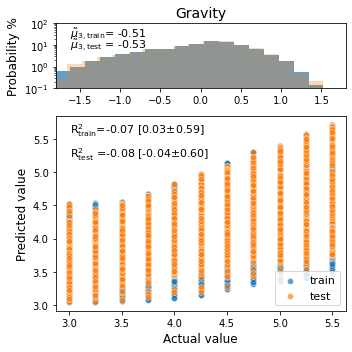

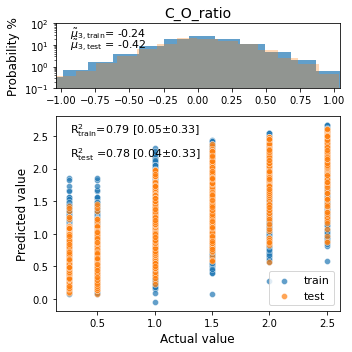

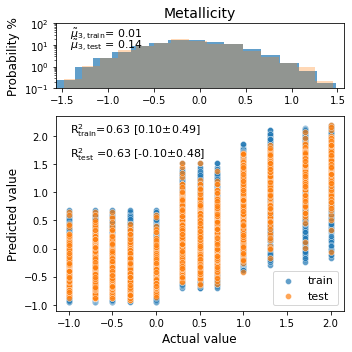

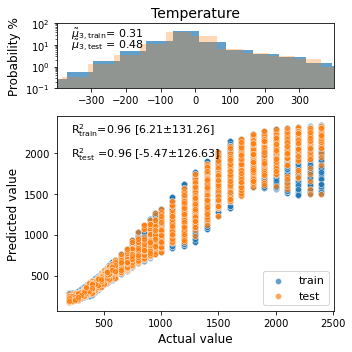

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )